In [7]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data=pd.DataFrame({'row':[], 'column':[], 'time(s)':[], 'method':[]})

In [297]:
# for loop을 통해 distance를 계산
def distance_for(arr):        
    dist=np.zeros((arr.shape[0],arr.shape[0]))    
    for i in range(arr.shape[0]):
        for j in range(i+1,arr.shape[0]):            
            sum=0
            for k in range(arr.shape[1]):
                sum+=np.square(arr[i][k]-arr[j][k])
            dist[i][j]=np.round(np.sqrt(sum),2)
            dist[j][i]=dist[i][j]
    # print(dist)

In [298]:
# vectorize를 통해 distance를 계산
def distance_vectorize(arr):    
    #dist=np.round(np.sqrt(np.sum((arr[:, np.newaxis]-arr)**2, axis=2)),2) -- MemoryError
    
    sumSquare=np.sum(np.square(arr), axis=1)
    mul=np.dot(arr,arr.T)
    dist=np.round(np.sqrt(np.abs(sumSquare[:, np.newaxis]+sumSquare-2*mul)),2)
    # print(dist)

In [299]:
# row과 column의 크기를 조정하면서 시간을 측정
row,col=1000,10000
arr=np.random.normal(0,1,(row,col))
start = time.time()
# distance_for(arr)
distance_vectorize(arr)
end = time.time()
print(round(end-start,5))

0.13718


In [300]:
'''
for
(10,10) 0.00120 | 0.00151 | 0.00101 | 0.00121 | 0.00199
(10,100) 0.00557 | 0.00649 | 0.00609 | 0.00598 | 0.00499
(10,1000) 0.06055 | 0.06228 | 0.05294 | 0.05410 | 0.05491
(10,10000) 0.51171 | 0.50439 | 0.50801 | 0.51158 | 0.50669
(100,10) 0.10738 | 0.11340 | 0.11051 | 0.11214 | 0.11876
(100,100) 0.60068 | 0.60882 | 0.60025 | 0.59492 | 0.60427
(100,1000) 5.65723 | 5.67052 | 5.75093 | 5.71548 | 5.65877
(100,10000) 55.69788 | 55.50849 | 55.88807 | 55.66119 | 55.88618
(1000,10) 10.7593 | 10.7629 | 10.76044 | 10.86909 | 10.89428
(1000,100) 60.61178 | 60.34644 | 60.53926 | 60.47265 | 60.43022
(1000,1000) 598.60519 | 609.50846 | 661.94974 | 630.54715 | 612.99796
(1000,10000) 5529.56851 | 5869.51552 | 5743.29614 | 5604.25181 | 5569.06519

vectorize
(10,10) 0.0 | 0.0 | 0.0 | 0.0 | 0.0
(10,100) 0.0 | 0.0 | 0.0 | 0.0 | 0.0
(10,1000) 0.0 | 0.001 | 0.001 | 0.0 | 0.001
(10,10000) 0.001 | 0.0 | 0.0 | 0.0 | 0.001
(100,10) 0.00101 | 0.0 | 0.00106 | 0.0 | 0.001
(100,100) 0.0 | 0.0 | 0.001 | 0.0 | 0.001
(100,1000) 0.001 | 0.0 | 0.001 | 0.001 | 0.00111
(100,10000) 0.00698 | 0.00645 | 0.0065 | 0.00798 | 0.00998
(1000,10) 0.0316 | 0.03183 | 0.02973 | 0.02959 | 0.0369
(1000,100) 0.02783 | 0.02715 | 0.03354 | 0.03491 | 0.02893
(1000,1000) 0.0422 | 0.04001 | 0.05479 | 0.03767 | 0.03738
(1000,10000) 0.14479 | 0.14431 | 0.11484 | 0.11619 | 0.12636
'''

'\nfor\n(10,10) 0.00120 | 0.00151 | 0.00101 | 0.00121 | 0.00199\n(10,100) 0.00557 | 0.00649 | 0.00609 | 0.00598 | 0.00499\n(10,1000) 0.06055 | 0.06228 | 0.05294 | 0.05410 | 0.05491\n(10,10000) 0.51171 | 0.50439 | 0.50801 | 0.51158 | 0.50669\n(100,10) 0.10738 | 0.11340 | 0.11051 | 0.11214 | 0.11876\n(100,100) 0.60068 | 0.60882 | 0.60025 | 0.59492 | 0.60427\n(100,1000) 5.65723 | 5.67052 | 5.75093 | 5.71548 | 5.65877\n(100,10000) 55.69788 | 55.50849 | 55.88807 | 55.66119 | 55.88618\n(1000,10) 10.7593 | 10.7629 | 10.76044 | 10.86909 | 10.89428\n(1000,100) 60.61178 | 60.34644 | 60.53926 | 60.47265 | 60.43022\n(1000,1000) 598.60519 | 609.50846 | 661.94974 | 630.54715 | 612.99796\n(1000,10000) 5529.56851 | 5869.51552 | 5743.29614 | 5604.25181 | 5569.06519\n\nvectorize\n(10,10) 0.0 | 0.0 | 0.0 | 0.0 | 0.0\n(10,100) 0.0 | 0.0 | 0.0 | 0.0 | 0.0\n(10,1000) 0.0 | 0.001 | 0.001 | 0.0 | 0.001\n(10,10000) 0.001 | 0.0 | 0.0 | 0.0 | 0.001\n(100,10) 0.00101 | 0.0 | 0.00106 | 0.0 | 0.001\n(100,100) 0.0 |

In [11]:
# for loop의 결과를 dataframe에 넣기
for_loop = '0.00120 | 0.00151 | 0.00101 | 0.00121 | 0.00199\
 | 0.00557 | 0.00649 | 0.00609 | 0.00598 | 0.00499\
 | 0.06055 | 0.06228 | 0.05294 | 0.05410 | 0.05491\
 | 0.51171 | 0.50439 | 0.50801 | 0.51158 | 0.50669\
 | 0.10738 | 0.11340 | 0.11051 | 0.11214 | 0.11876\
 | 0.60068 | 0.60882 | 0.60025 | 0.59492 | 0.60427\
 | 5.65723 | 5.67052 | 5.75093 | 5.71548 | 5.65877\
 | 55.69788 | 55.50849 | 55.88807 | 55.66119 | 55.88618\
 | 10.7593 | 10.7629 | 10.76044 | 10.86909 | 10.89428\
 | 60.61178 | 60.34644 | 60.53926 | 60.47265 | 60.43022\
 | 598.60519 | 609.50846 | 661.94974 | 630.54715 | 612.99796\
 | 5529.56851 | 5869.51552 | 5743.29614 | 5604.25181 | 5569.06519'
list=for_loop.split(' | ')
list.reverse()
for row in [10,100,1000]:
    for col in [10,100,1000,10000]:
        sum=0
        for i in range(5):
            sum+=float(list.pop())
        data.loc[data.shape[0]]=[row, col, round(sum/5,5), 'for']

In [13]:
# vecterize의 결과를 dataframe에 넣기
# 각 행렬 사이즈별로 5번씩 측정한 시간을 평균을 내서 사용
vecterize = '0.0 | 0.0 | 0.0 | 0.0 | 0.0\
 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0\
 | 0.0 | 0.001 | 0.001 | 0.0 | 0.001\
 | 0.001 | 0.0 | 0.0 | 0.0 | 0.001\
 | 0.00101 | 0.0 | 0.00106 | 0.0 | 0.001\
 | 0.0 | 0.0 | 0.001 | 0.0 | 0.001\
 | 0.001 | 0.0 | 0.001 | 0.001 | 0.00111\
 | 0.00698 | 0.00645 | 0.0065 | 0.00798 | 0.00998\
 | 0.0316 | 0.03183 | 0.02973 | 0.02959 | 0.0369\
 | 0.02783 | 0.02715 | 0.03354 | 0.03491 | 0.02893\
 | 0.0422 | 0.04001 | 0.05479 | 0.03767 | 0.03738\
 | 0.14479 | 0.14431 | 0.11484 | 0.11619 | 0.12636'
list=vecterize.split(' | ')
list.reverse()
for row in [10,100,1000]:
    for col in [10,100,1000,10000]:
        sum=0
        for i in range(5):
            sum+=float(list.pop())
        data.loc[data.shape[0]]=[row, col, round(sum/5,5), 'vectorize']

In [15]:
data.head()

,row,column,time(s),method
0,10,10,0.00138,for
1,10,100,0.00582,for
2,10,1000,0.05696,for
3,10,10000,0.50848,for
4,100,10,0.11244,for


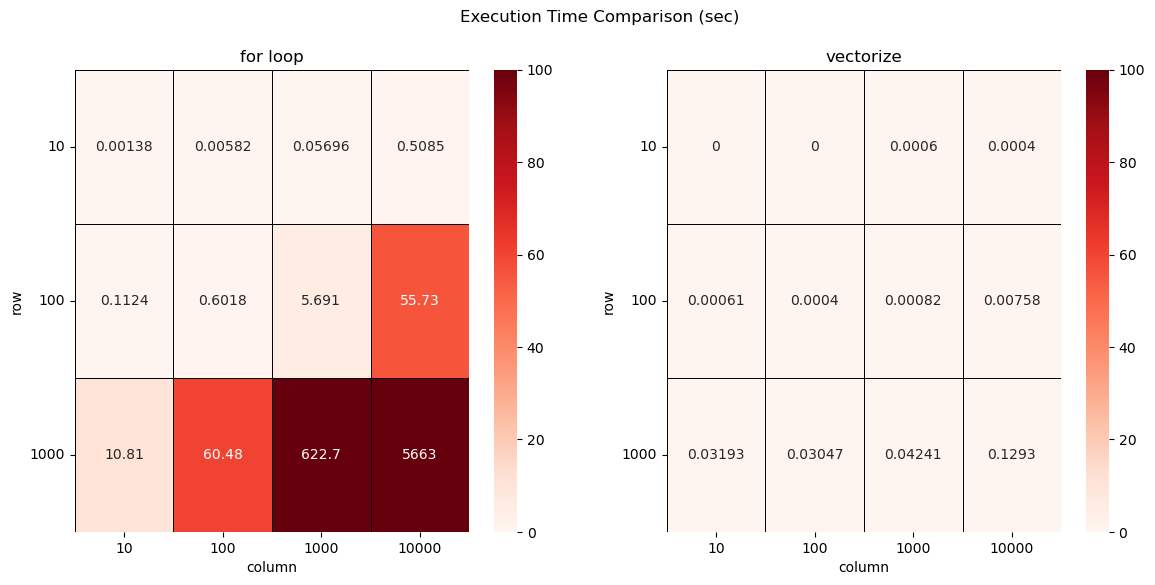

In [39]:
fig, axes=plt.subplots(1, 2, figsize=(14, 6))

df1=data.loc[data.method=='for']
map1=df1.pivot(index='row', columns='column', values='time(s)')
sns.heatmap(map1, ax=axes[0], annot=True, fmt='.4g', linewidth=0.5, linecolor='black', vmin=0, vmax=100, cmap='Reds')
axes[0].tick_params(axis='y',rotation=0)
axes[0].set_title('for loop')

df2=data.loc[data.method=='vectorize']
map2=df2.pivot(index='row', columns='column', values='time(s)')
sns.heatmap(map2, ax=axes[1], annot=True, fmt='.4g', linewidth=0.5, linecolor='black', vmin=0, vmax=100, cmap='Reds')
axes[1].tick_params(axis='y',rotation=0)
axes[1].set_title('vectorize')

plt.suptitle('Execution Time Comparison (sec)')
plt.show()

In [3]:
# 3번 문제
from statistics import quantiles
ll=np.array([55,57,58,59,60,63,64,65,69,70,72,73,75,78,80,82,88,90,110,130])
print(np.quantile(ll, (0.25,0.50,0.75)))
print(quantiles(ll, method='inclusive'))

[62.25 71.   80.5 ]
[62.25, 71.0, 80.5]


In [5]:
from statistics import quantiles
ll=np.array([1,2,3,4,5,6,7,8,9])
print(quantiles(ll, method='inclusive'))
print(quantiles(ll))

[3.0, 5.0, 7.0]
[2.5, 5.0, 7.5]
